# 001 Importing the Dependencies

In [1]:
# Import pandas package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBRegressor
from sklearn import metrics


# 002 Data Collection and Analysis

In [3]:
# Loading data to pandas DataFrame
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# loading csv File
file_path = '/content/drive/MyDrive/Colab Notebooks/ML_Practice_Projects/Project 12 Big Mart Sales Prediction/Train.csv'
big_mart_data=pd.read_csv(file_path)
pd.set_option('display.max_columns',None)

In [5]:
big_mart_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [6]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
big_mart_data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [8]:
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [9]:
# No of data points and no of columns
big_mart_data.shape

(8523, 12)

In [10]:
big_mart_data.isnull().sum()


Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [11]:

big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84a89f34f0>,
      dtype=object)

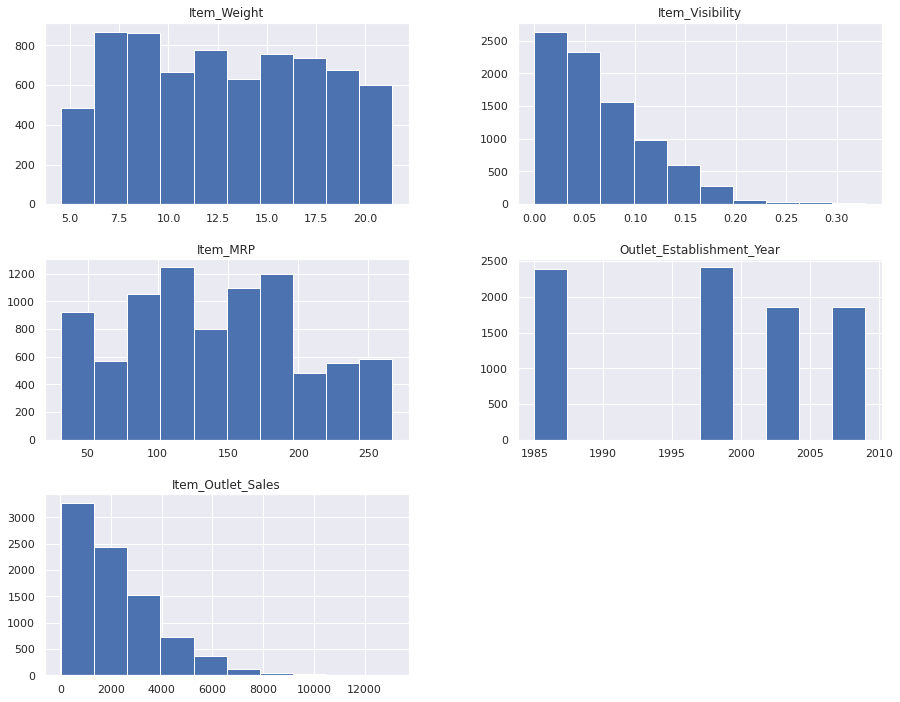

In [12]:
big_mart_data.hist(figsize=(15,12))

In [13]:
big_mart_data.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [14]:
big_mart_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Categorical Features


1.   'Item_Identifier'
2.   'Item_Fat_Content'
3.   'Item_Type'
4.   'Outlet_Identifier'
5.   'Outlet_Size'
6.   'Outlet_Location_Type'
7.   'Outlet_Type'



In [15]:
# Checking for missing values
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## 2.1 Handling missing values
Mean ---->>> Average Value (Used in case of numerical/continuous data)

Mode ---->>> Most Repeated value (Used in case of categorical data)


In [16]:
# mean of 'Item_weight' column
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [17]:
# Filling the missing values in 'Item_weight' column with mean value
big_mart_data['Item_Weight'].fillna(big_mart_data['Item_Weight'].mean(), inplace=True) 

In [18]:
# Checking for missing values again
big_mart_data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [19]:
# Replacing the missing values in 'Outlet_Size' with mode
big_mart_data['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [20]:
mode_of_outlet_size=big_mart_data.pivot_table(values = 'Outlet_Size', columns='Outlet_Type',aggfunc=(lambda x:x.mode()[0]))

In [21]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [22]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [23]:
print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [24]:
big_mart_data.loc[missing_values,'Outlet_Size'] = big_mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x:mode_of_outlet_size)

In [25]:
# Checking for missing values again
big_mart_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

# 3.0 Data Analysis

In [26]:
# Gives statistical measures for numerical data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


Numerical Features

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


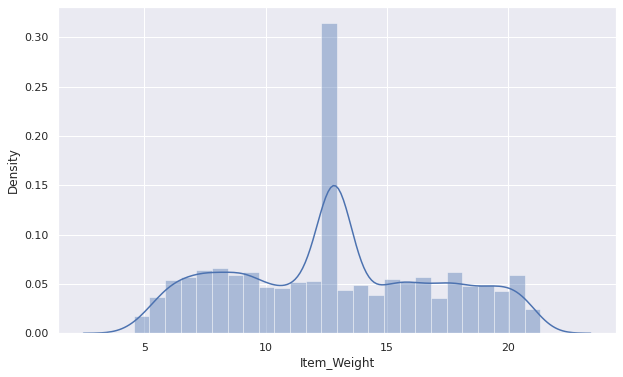

In [27]:
# 	'Item_Weight' distribution
plt.figure(figsize=(10,6))
sns.distplot(big_mart_data['Item_Weight'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


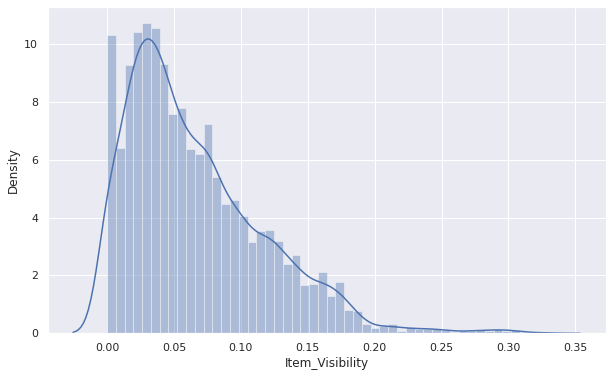

In [28]:
# 	'Item_Visibility' distribution
plt.figure(figsize=(10,6))
sns.distplot(big_mart_data['Item_Visibility'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


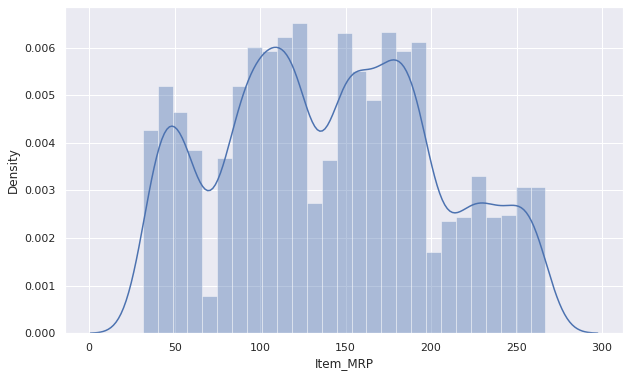

In [29]:
# 	'Item_MRP' distribution
plt.figure(figsize=(10,6))
sns.distplot(big_mart_data['Item_MRP'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


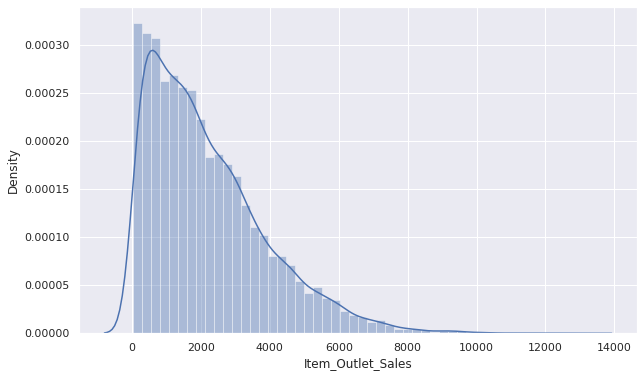

In [30]:
# 	'Item_Outlet_Sales' distribution
plt.figure(figsize=(10,6))
sns.distplot(big_mart_data['Item_Outlet_Sales'])
plt.show()

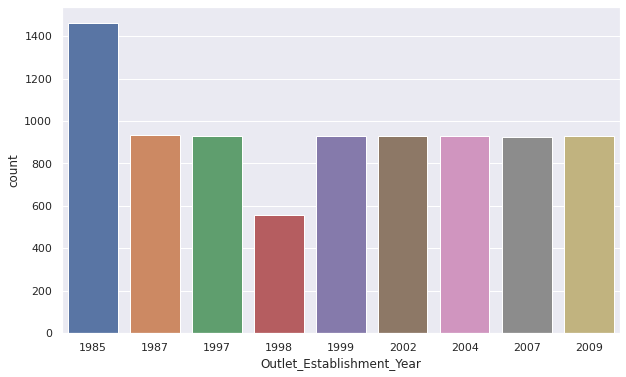

In [31]:
# 	'Outlet_Establishment_Year' distribution
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()

Countplot for categorical Features

1.   'Item_Identifier'
2.   'Item_Fat_Content'
3.   'Item_Type'
4.   'Outlet_Identifier'
5.   'Outlet_Size'
6.   'Outlet_Location_Type'
7.   'Outlet_Type'

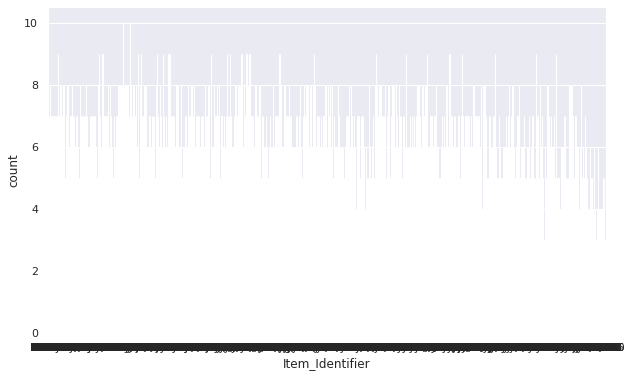

In [32]:
# # 	 'Item_Identifier' distribution
# plt.figure(figsize=(10,6))
# sns.countplot(x= 'Item_Identifier', data=big_mart_data)
# plt.show()

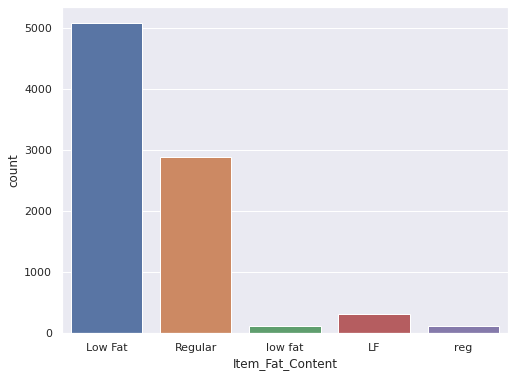

In [36]:
# 	 'Item_Fat_Content' distribution
plt.figure(figsize=(8,6))
sns.countplot(x= 'Item_Fat_Content', data=big_mart_data)
plt.show()

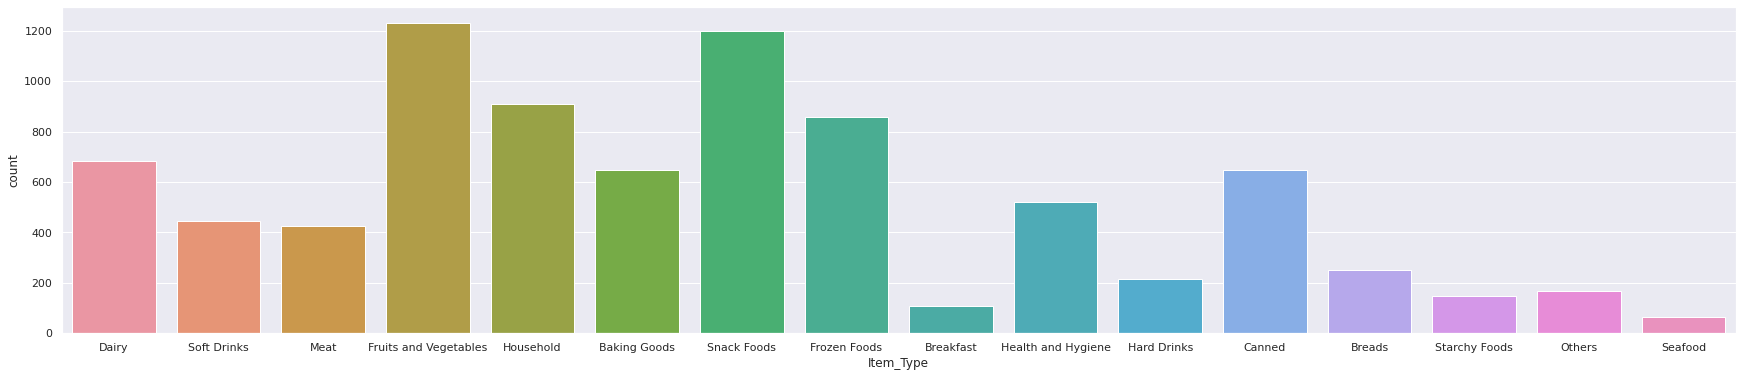

In [37]:
# 	 'Item_Type' distribution

plt.figure(figsize=(30,6))
sns.countplot(x= 'Item_Type', data=big_mart_data)
plt.show()

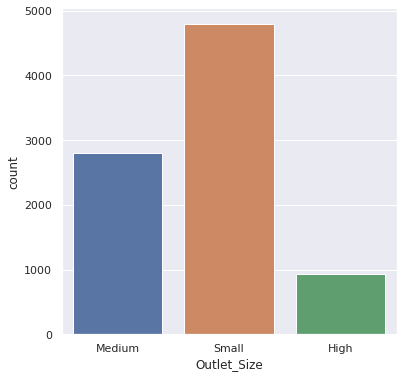

In [43]:
# 	 'Outlet_Size' distribution
big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])
plt.figure(figsize=(6,6))
sns.countplot(x= 'Outlet_Size', data=big_mart_data)
plt.show()

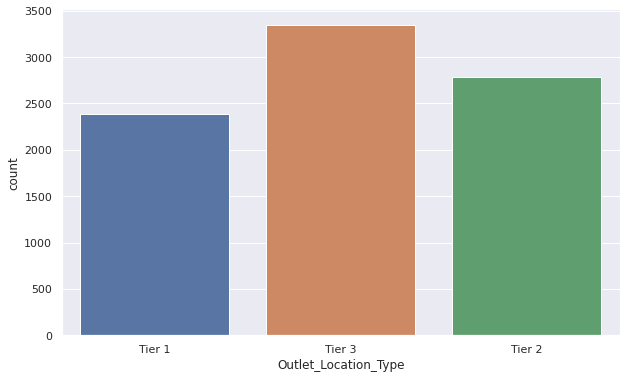

In [45]:
# # 	 'Outlet_Location_Type' distribution

plt.figure(figsize=(10,6))
sns.countplot(x= 'Outlet_Location_Type', data=big_mart_data)
plt.show()

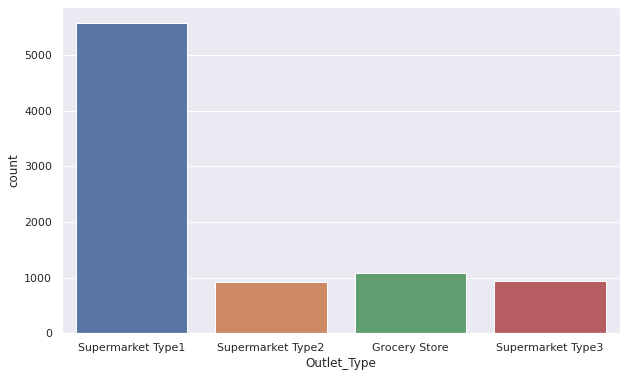

In [46]:
# # 	 'Outlet_Type'' distribution

plt.figure(figsize=(10,6))
sns.countplot(x= 'Outlet_Type', data=big_mart_data)
plt.show()

In [47]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [48]:
big_mart_data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [51]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}}, inplace = True)

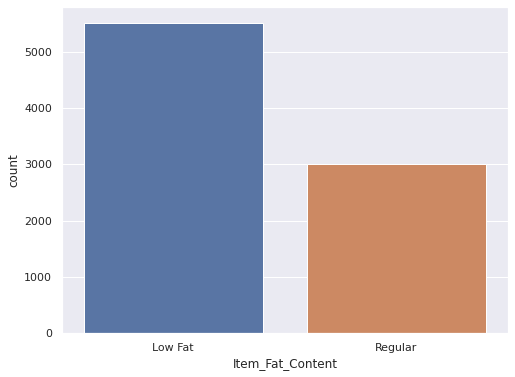

In [52]:
# 	 'Item_Fat_Content' distribution
plt.figure(figsize=(8,6))
sns.countplot(x= 'Item_Fat_Content', data=big_mart_data)
plt.show()

# Label Encoding

In [53]:
encoder = LabelEncoder()

In [56]:
big_mart_data['Item_Identifier']  = encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content']  = encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type']  = encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier']  = encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size']  = encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type']  = encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type']  = encoder.fit_transform(big_mart_data['Outlet_Type'])

In [57]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


# Splitting features and Target

In [58]:
X = big_mart_data.drop('Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [59]:
print(X)
print(Y)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

# Splitting data into training data and testing data

In [60]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size= 0.2, random_state = 2)

In [63]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [64]:
print(Y.shape, Y_train.shape, Y_test.shape)

(8523,) (6818,) (1705,)


# Machine Learning Model Training
XGBoost regressor

In [65]:
regressor = XGBRegressor()

In [67]:
regressor.fit(X_train,Y_train)

[16:08:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

# Evaluation

In [ ]:
# On training data

In [68]:
training_data_prediction = regressor.predict(X_train)

In [69]:
training_data_prediction

array([2418.3772, 2746.621 , 4055.5798, ..., 3157.5945, 2403.4163,
       2384.821 ], dtype=float32)

In [71]:
# R squared value 
r2_train = metrics.r2_score(Y_train, training_data_prediction)
r2_train

0.6364457030941357

In [ ]:
# On test data

In [73]:
test_data_prediction = regressor.predict(X_test)
test_data_prediction

array([2170.391 , 3940.441 , 1354.8002, ..., 2749.128 , 3376.4092,
       3868.264 ], dtype=float32)

In [74]:
r2_test = metrics.r2_score(Y_test, test_data_prediction)
r2_test

0.5867640914432671

# Try with Linear Regression

In [75]:
from sklearn.linear_model import LinearRegression

In [76]:
model = LinearRegression()

In [77]:
model.fit(X_train,Y_train)

LinearRegression()

In [79]:
# Evaluation on training data
X_train_prediction = model.predict(X_train) 
X_train_prediction

array([2412.79920114, 3057.08179773, 3947.60089799, ..., 2448.23503665,
       2236.15045471, 3116.28956971])

In [80]:
# R squared value 
r2_train = metrics.r2_score(Y_train, X_train_prediction)
r2_train

0.5071929167339231

In [81]:
# Evaluation on test data
X_test_prediction = model.predict(X_test) 
X_test_prediction

array([2528.05383995, 3625.30926251, 1158.79233766, ..., 2111.72941652,
       4598.25557121, 3455.17062917])

In [82]:
r2_test = metrics.r2_score(Y_test, X_test_prediction)
r2_test

0.48912987193626367